<a href="https://colab.research.google.com/github/gayatriSund/customer_churn_prediction/blob/main/project_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# LOAD THE DATA
# Importing Libraries

# Utitlity Libraries
import numpy as np
import pandas as pd

# Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Algorithm, Evaluation, and Model Libraries
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from xgboost import XGBClassifier

In [ ]:
# Importing Dataset
data = pd.read_csv("/content/Dataset.csv")
# Printing Data
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.shape

(7043, 21)

In [ ]:
data.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


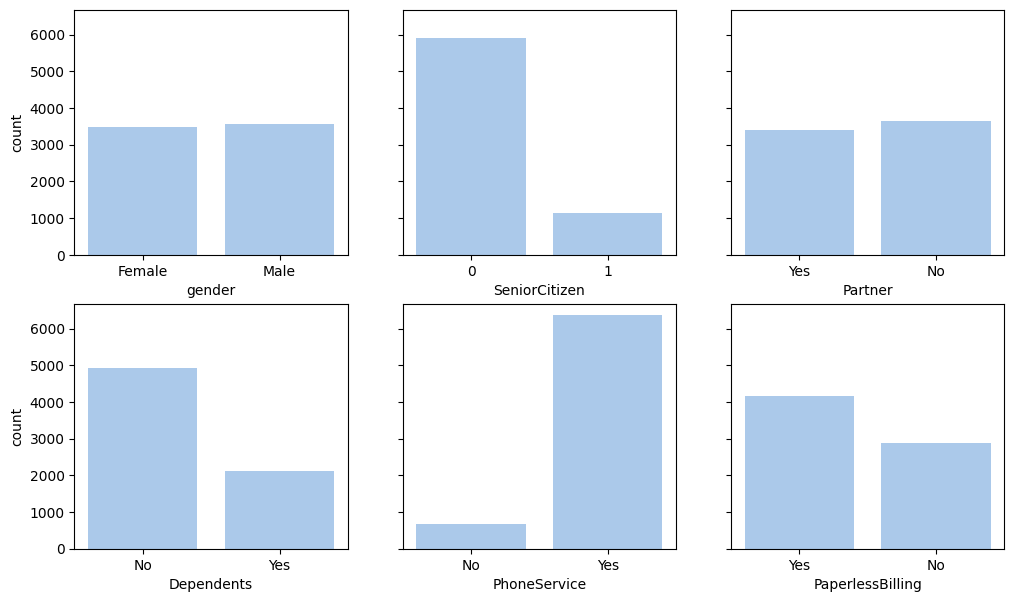

In [ ]:
with sns.color_palette("pastel"):
    fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
    sns.countplot(x="gender", data=data, ax=axes[0,0])
    sns.countplot(x="SeniorCitizen", data=data, ax=axes[0,1])
    sns.countplot(x="Partner", data=data, ax=axes[0,2])
    sns.countplot(x="Dependents", data=data, ax=axes[1,0])
    sns.countplot(x="PhoneService", data=data, ax=axes[1,1])
    sns.countplot(x="PaperlessBilling", data=data, ax=axes[1,2])

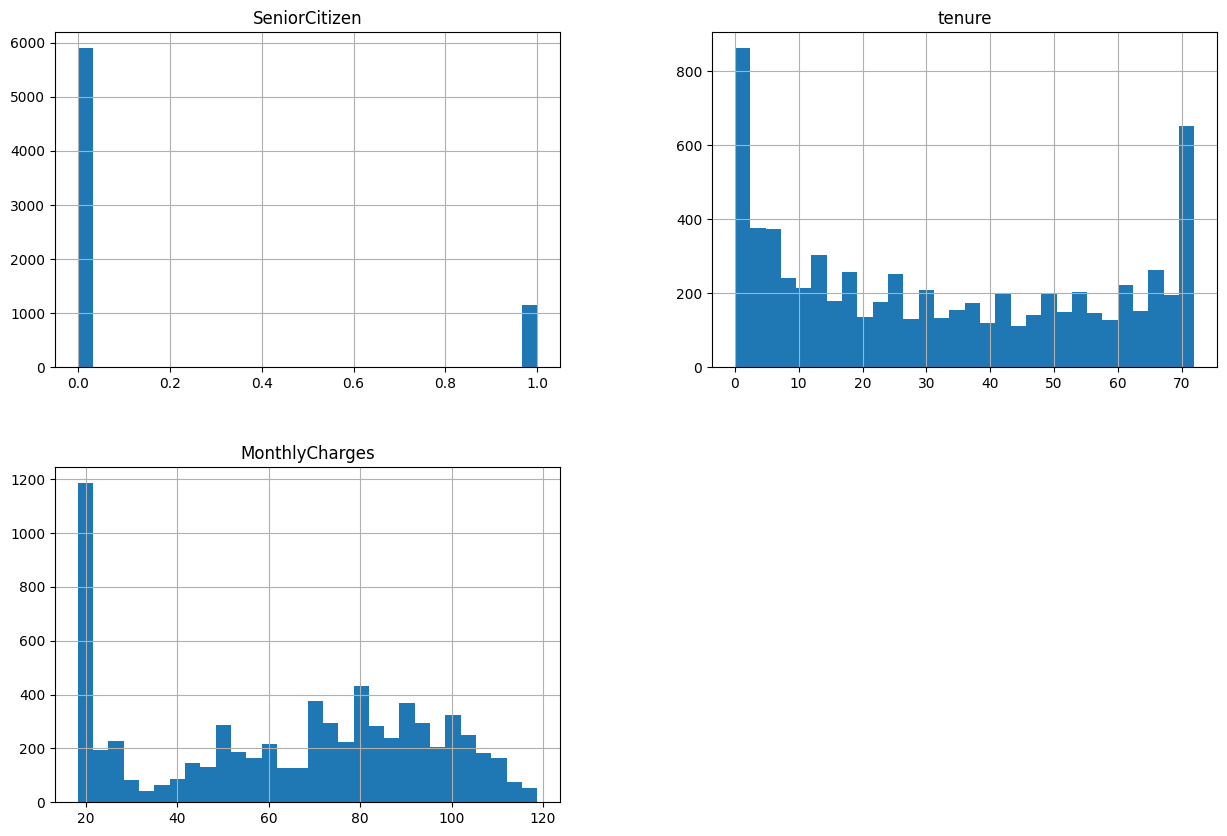

In [ ]:
data.hist(bins=30, figsize=(15, 10))
plt.show()

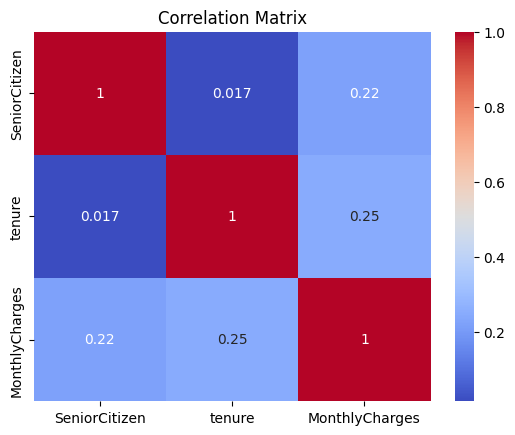

In [ ]:
# Correlation matrix
corr_matrix = data.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

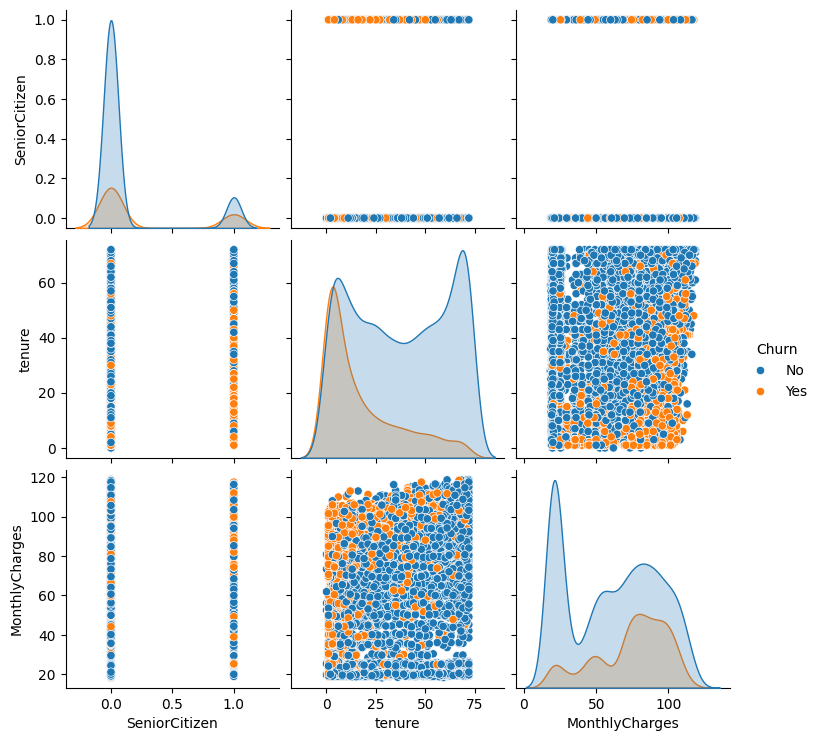

In [ ]:
#Pairplot
sns.pairplot(data, hue='Churn')
plt.show()

In [ ]:
#DATA CLEANING
churnnum = {'Yes':1, 'No':0}
data.Churn.replace(churnnum, inplace=True)
churnnum
genderval = pd.pivot_table(data, values='Churn', index=['gender'],
                    columns=['SeniorCitizen'], aggfunc=np.mean)
genderval
data.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)
data.columns

<ipython-input-11-c933d4528710>:5: FutureWarning: The provided callable <function mean at 0x7c83d5117d90> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  genderval = pd.pivot_table(data, values='Churn', index=['gender'],


Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'Churn'],
      dtype='object')

In [ ]:
# Resampling
X=data.copy()
nox = X[X.Churn == 0]
noy = X[X.Churn == 1]

yesupsampled = noy.sample(n=len(nox), replace=True, random_state=42)
print(len(yesupsampled))

yupsampled=pd.concat([nox, yesupsampled],axis=0)

5174


In [ ]:
# FEATURE ENGINEERING
!pip install scikit-learn # Install scikit-learn if you haven't already
from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler

minmax = MinMaxScaler()
a = minmax.fit_transform(data[['tenure']])
b = minmax.fit_transform(data[['MonthlyCharges']])
X['tenure'] = a
X['MonthlyCharges'] = b

X.shape

(7043, 16)

In [ ]:
# DATASET SPLITTING
from sklearn.model_selection import train_test_split
X = yupsampled.drop(['Churn'], axis=1) #features (independent variables)
y = yupsampled['Churn'] #target (dependent variable)

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)  # This will convert categorical columns to numerical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=50)

In [ ]:
#MODEL TRAINING, FITTING, TRAINING & EVALUATION
# Ridge Classifier

# Ceeating a model
ridgeclassifier = RidgeClassifier()

# Fitting Classifier
ridgeclassifier.fit(X_train, y_train)

# Predicting training values
pred = ridgeclassifier.predict(X_train)

# Getting accuracy
accuracy_score(y_train, pred)

# Predicting testing values
pred_test = ridgeclassifier.predict(X_test)

# Printing accuracy
accuracy_score(y_test, pred_test)

0.7495170637475853

In [ ]:
# Random Forest

# Creating Model
randomforest = RandomForestClassifier(n_estimators=250, max_depth=18)

# Fitting Model
randomforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=18, n_estimators=250)

In [ ]:
# Pridicting training accuracy
pred = randomforest.predict(X_train)

# Printing training accuracy
accuracy_score(y_train, pred)

# Predicting testing accuracy
pred_test = randomforest.predict(X_test)

# Printing testing score
accuracy_score(y_test, pred_test)

0.8937540244687702

In [ ]:
# Grid Search

# Setting parameters
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}

# Using Grid Search with Random Forest Classifier
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

# Fitting the model
clf.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25],
                         'n_estimators': [150, 200, 250, 300]})

Fitting 5 folds for each of 6 candidates, totalling 30 fits


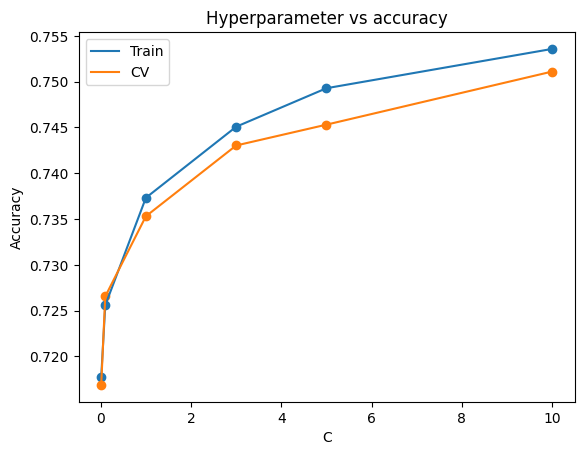

In [ ]:
# Grid Search To Get Best Hyperparameters
parameters = {'C':[0.01,0.1,1,3,5,10]}
svmclf = SVC(class_weight='balanced',random_state=43)
grid = GridSearchCV(estimator=svmclf, param_grid=parameters,scoring='accuracy',return_train_score=True,verbose=1)
grid.fit(X_train,y_train)

# Plotting the values
cv_result = pd.DataFrame(grid.cv_results_)
plt.scatter(cv_result['param_C'],cv_result['mean_train_score'])
plt.plot(cv_result['param_C'],cv_result['mean_train_score'],label='Train')
plt.scatter(cv_result['param_C'],cv_result['mean_test_score'])
plt.plot(cv_result['param_C'],cv_result['mean_test_score'],label="CV")
plt.title('Hyperparameter vs accuracy')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Getting the best parameters and score
clf.best_params_
{'max_depth': 20, 'n_estimators': 150}
clf.best_score_

0.8974681694113473

Train accuracy SVM:  0.7458783399658897
Test accuracy SVM:  0.7282678686413393
Recall Score:  0.7370466321243523


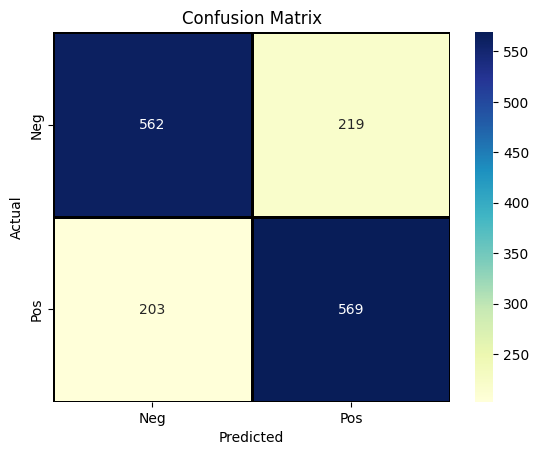

In [ ]:
# Training the model using the optimal parameters discovered with SVM Classifier
svmclf =  SVC(C=3,class_weight='balanced', random_state=43)
svmclf.fit(X_train,y_train)

result2 = ["2.","SVM","Balanced using class weights"]
y_pred_tr = svmclf.predict(X_train)
print('Train accuracy SVM: ',accuracy_score(y_train,y_pred_tr))
result2.append(round(accuracy_score(y_train,y_pred_tr),2))

y_pred_test = svmclf.predict(X_test)
print('Test accuracy SVM: ',accuracy_score(y_test,y_pred_test))
result2.append(round(accuracy_score(y_test,y_pred_test),2))

recall = recall_score(y_test,y_pred_test)
print("Recall Score: ",recall)
result2.append(round(recall,2))

# Building a confusion matrix
matrix = confusion_matrix(y_test,y_pred_test)
ax=plt.subplot();
sns.heatmap(matrix, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

Fitting 5 folds for each of 144 candidates, totalling 720 fits


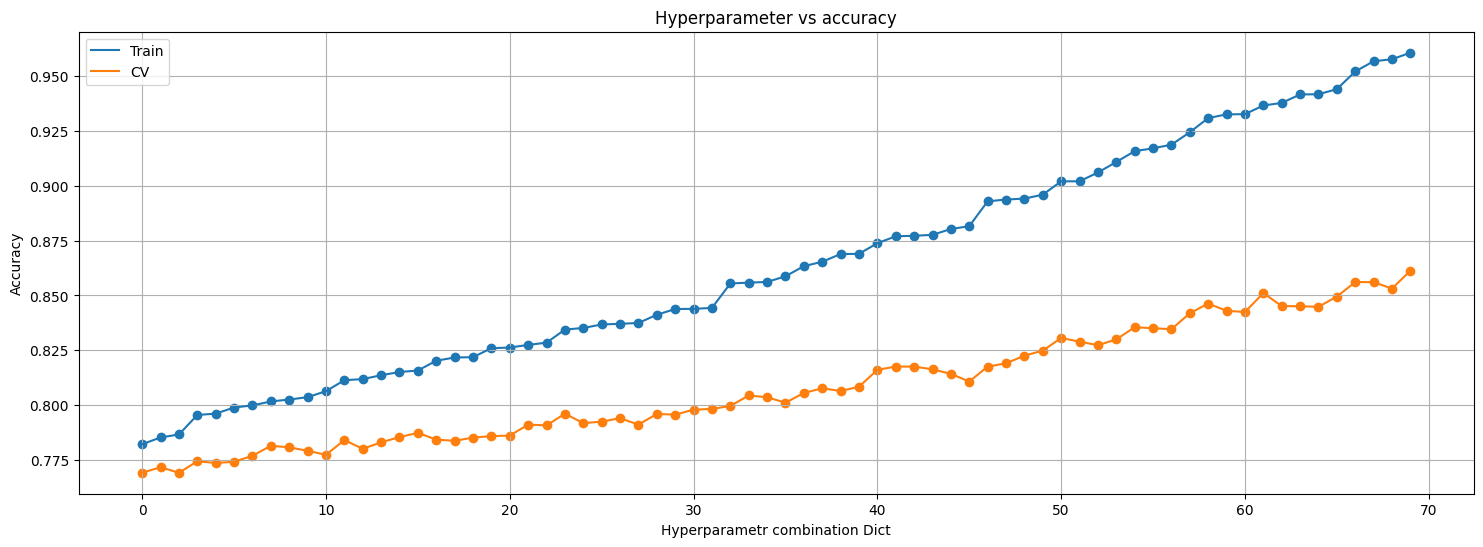

In [ ]:
import math
scale=round(math.sqrt(y_train.value_counts()[0]/y_train.value_counts()[1]),2)
# Grid Search To Get Best Hyperparameters
parameters = {"learning_rate"    : [0.10,0.20,0.30 ],\
              "max_depth"        : [ 3,5,10,20],\
              "n_estimators" : [ 100, 200, 300, 500],\
              "colsample_bytree" : [ 0.3, 0.5, 0.7 ] }
clf_xgb = XGBClassifier(scale_pos_weight=scale, eval_metric ='mlogloss')
grid = GridSearchCV(estimator=clf_xgb, param_grid=parameters, scoring='accuracy',return_train_score=True,verbose=1)
grid.fit(X_train,y_train)

# plotting only the first 70 train scores
cv_result = pd.DataFrame(grid.cv_results_).sort_values(by='mean_train_score',ascending=True)[:70]
param_list = list(cv_result['params'])
param_index = np.arange(70)
plt.figure(figsize=(18,6))
plt.scatter(param_index,cv_result['mean_train_score'])
plt.plot(param_index,cv_result['mean_train_score'],label='Train')
plt.scatter(param_index,cv_result['mean_test_score'])
plt.plot(param_index,cv_result['mean_test_score'],label="CV")
plt.title('Hyperparameter vs accuracy')
plt.grid()
plt.legend()
plt.xlabel('Hyperparametr combination Dict')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
best_parameters = param_list[34]
print(best_parameters)

{'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


Train accuracy XGB:  0.8546901648664014
Test accuracy XGB:  0.8048937540244687
Recall Score:  0.8588082901554405


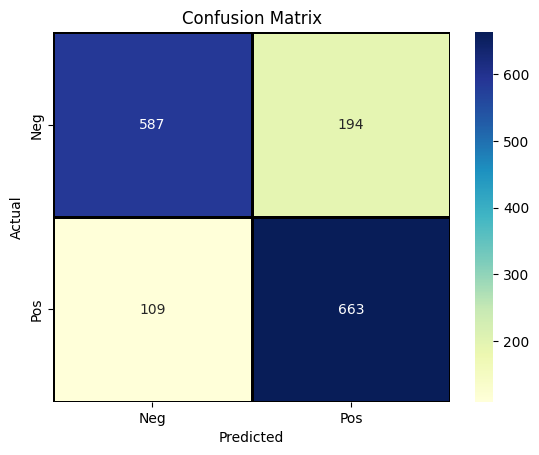

In [ ]:
# Using XG Boost
clf_xgb = XGBClassifier(learning_rate= best_parameters['learning_rate'] ,max_depth=best_parameters ['max_depth'], n_estimators=best_parameters['n_estimators'], colsample_bytree=best_parameters['colsample_bytree'],                        eval_metric='mlogloss',scale_pos_weight=scale)
clf_xgb.fit(X_train,y_train)

xgbresult = ["4.","XGBClassifier","Balanced using scale_pos_weight"]
y_pred_tr = clf_xgb.predict(X_train)
print('Train accuracy XGB: ',accuracy_score(y_train,y_pred_tr))
xgbresult.append(round(accuracy_score(y_train,y_pred_tr),2))

# Use X_test here instead of X_train
y_pred_test = clf_xgb.predict(X_test)
print('Test accuracy XGB: ',accuracy_score(y_test,y_pred_test))
xgbresult.append(round(accuracy_score(y_test,y_pred_test),2))

recall = recall_score(y_test,y_pred_test)
print("Recall Score: ",recall)
xgbresult.append(round(recall,2))

# Building confusion matrix
cm = confusion_matrix(y_test,y_pred_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

In [ ]:
#CONCLUSION
# Customer Churn Prediction Project determines when a customer is about to leave the organization.
# Random Forest and XGBoost give us the best accuracy in this situation.